# A demo of Computer final project

This demo illustrates how to solve convection-diffusion equation using a finite element formulation. 
In particular, it illustrates how to:

1. Create mesh
2. Assemble linear system $Ax=b$ and apply boundary conditions
3. Solve linear system
4. Plot solutiong

Let's start!

<bf><font color='red'>Note:</font> In following code cell, omit the command <font color='blue'>%%matlab</font>.

In [1]:
import pymatbridge
ip = get_ipython()
pymatbridge.load_ipython_extension(ip)

Starting MATLAB on ZMQ socket tcp://127.0.0.1:58011
Send 'exit' command to kill the server
............MATLAB started and connected!


## Problem 

Consider the following one-dimensional convection-diffusion problem

$$\begin{split}
    & -\varepsilon u''(x) + u'(x) = 1,\quad\mbox{for }x\in(0,1) \\
    & u(0) = 0,\quad u(1) = 0
\end{split}
$$

## Variational formulation

Find $u\in V$ such that 
$$
    \varepsilon(u', v') + (u', v) = (1, v),\qquad\forall\ v\in V.
$$
where $(v,w) = \int_0^1 v(x)w(x)dx$.


## Finite element method

Find $u_h\in V_h$ such that 
$$
    \varepsilon(u'_h, v'_h) + (u'_h, v_h) = (1, v_h),\qquad\forall\ v_h\in V_h.
$$

## Implement

Finally, we reach at the following linear system

$$
\begin{bmatrix}
-\frac{2\varepsilon}{h} & -\frac{\varepsilon}{h} + \frac{1}{2} & 0 & 0  \\
-\frac{\varepsilon}{h} - \frac{1}{2} & -\frac{2\varepsilon}{h} & -\frac{\varepsilon}{h} + \frac{1}{2} & 0  \\
0 & -\frac{\varepsilon}{h} - \frac{1}{2} & -\frac{2\varepsilon}{h} & -\frac{\varepsilon}{h} + \frac{1}{2}  \\
0 & 0 & -\frac{\varepsilon}{h} - \frac{1}{2} & -\frac{2\varepsilon}{h} \\
\end{bmatrix}
\begin{bmatrix}
U_1 \\ U_2 \\ U_3 \\ U_4
\end{bmatrix}=
\begin{bmatrix}
h - (-\frac{\varepsilon}{h} - \frac{1}{2})U_0 \\ h \\ h \\ h - (-\frac{\varepsilon}{h} + \frac{1}{2})U_5
\end{bmatrix}
$$

<br><font color='red'>The instructor will provide these details in later.</font>

In [ ]:
%%matlab

left_coef = -epsilon / h - (1 / 2)
right_coef = -epsilon / h + (1 / 2);
center_coef = (2 * epsilon) / h;

A = zeros(m, m);
for i = 1:m
    for j = 1:m
        
        if (i == j)
            A(i, j) = center_coef;
        end
        
        if (j == i - 1)
            A(i, j) = left_coef;
        end
        
        if (j == i + 1)
            A(i, j) = right_coef;
        end
    end
end

b = zeros(m, 1);
for i = 1:m
    
    b(i) = h;
    
    if (i == 1)
        b(i) = b(i) - left_coef * u0;
    end
    
    if (i == m)
        b(m) = b(m) - right_coef * u1;
    end
end

## Complete code

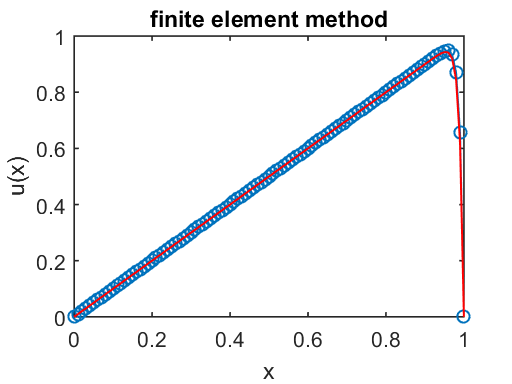

In [4]:
%%matlab

epsilon = 0.01;
ue = @(x) (x - exp((x-1)/epsilon) - x .* exp(-1 / epsilon) + exp(-1 / epsilon)) / (1 - exp(-1/epsilon));

% Define boundary condition
u0 = 0;
u1 = 0;

% Crate mesh
n = 100;
h = 1 / n;
m = n - 1;
x = linspace(0, 1, n + 1);

% Assemble linear system

left_coef = -epsilon / h - (1 / 2);
right_coef = -epsilon / h + (1 / 2);
center_coef = (2 * epsilon) / h;

A = zeros(m, m);
for i = 1:m
    for j = 1:m
        
        if (i == j)
            A(i, j) = center_coef;
        end
        
        if (j == i - 1)
            A(i, j) = left_coef;
        end
        
        if (j == i + 1)
            A(i, j) = right_coef;
        end
    end
end

b = zeros(m, 1);
for i = 1:m
    
    b(i) = h;
    
    if (i == 1)
        b(i) = b(i) - left_coef * u0;
    end
    
    if (i == m)
        b(m) = b(m) - right_coef * u1;
    end
end

% Solving linear system
fem_sol = A\b;
fem_sol = [u0; fem_sol; u1];


plot(x, fem_sol, '-o',x, ue(x), 'r')
title('finite element method')
xlabel('x')